In [7]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

import statsmodels.api as sm

%matplotlib inline

In [8]:
datapath = '~/Desktop/interview-prep/data-science/Code/mushrooms.csv'

data = pd.read_csv(datapath)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


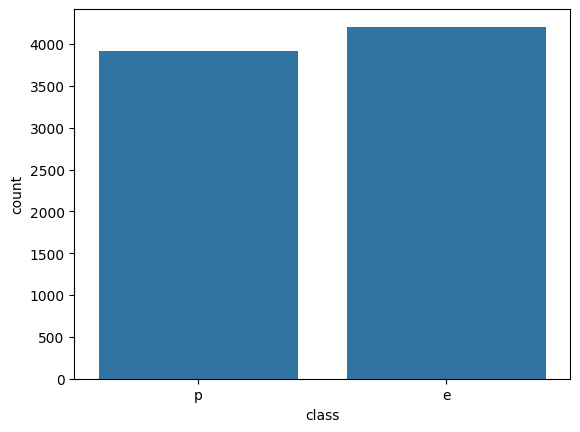

In [9]:
x = data['class']
ax = sns.countplot(x = x, data = data)

In [10]:
def plot_data(hue, data): 
    for i, col in enumerate(data.columns): 
        plt.figure(i)
        ax = sns.countplot(x = data[col], hue = hue, data = data)

# hue = data['class']
# data_to_plot = data.drop('class', axis = 1)

# plot_data(hue, data)

In [11]:
for col in data.columns: 
    print(f"{col}: {data[col].isnull().sum()}")
    

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


In [12]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [13]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False


In [14]:
y = data['class'].values.reshape(-1, 1)
X = encoded_data.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train.ravel())

y_prob = logistic_reg.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

In [20]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [21]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

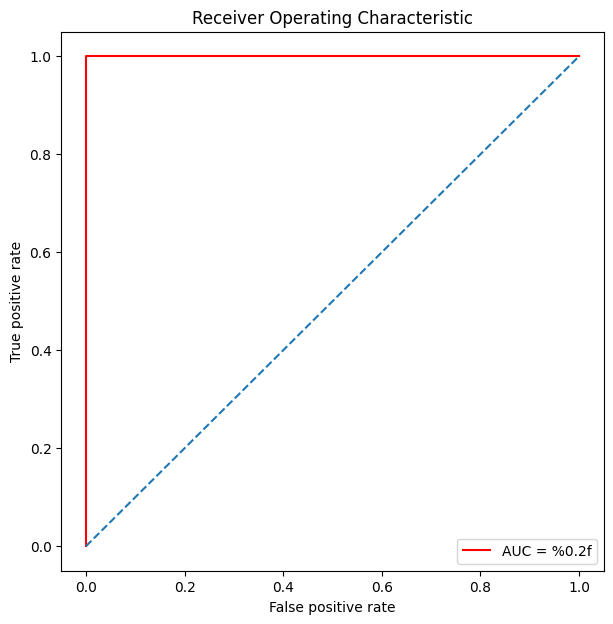

In [22]:
def plot_roc(roc_auc): 
    plt.figure(figsize = (7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1], linestyle = "--")
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

plot_roc(roc_auc)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:, 1]
y_pred_lda = (y_prob_lda > 0.5).astype(int)

In [25]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

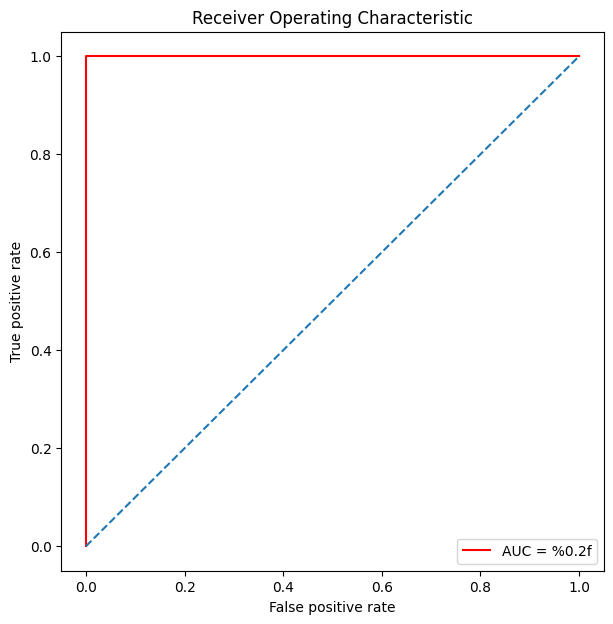

In [29]:
plot_roc(roc_auc_lda)

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [31]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = (y_prob_lda > 0.5).astype(int)

/Users/bhavjotsingh/Desktop/interview-prep/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/bhavjotsingh/Desktop/interview-prep/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [32]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

1.0

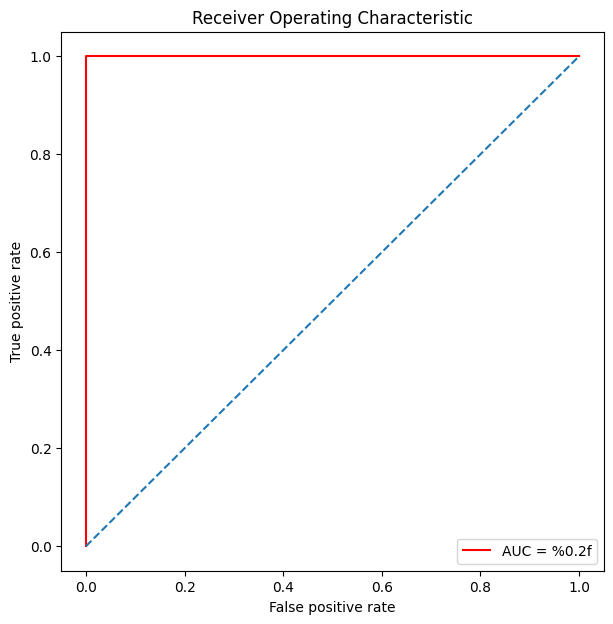

In [34]:
plot_roc(roc_auc_qda)